In [2]:
import pandas as pd
import scipy.stats as sts
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [7]:
"""1.Загрузить файл hr.csv."""

df=pd.read_csv("HR.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
"""2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)."""

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


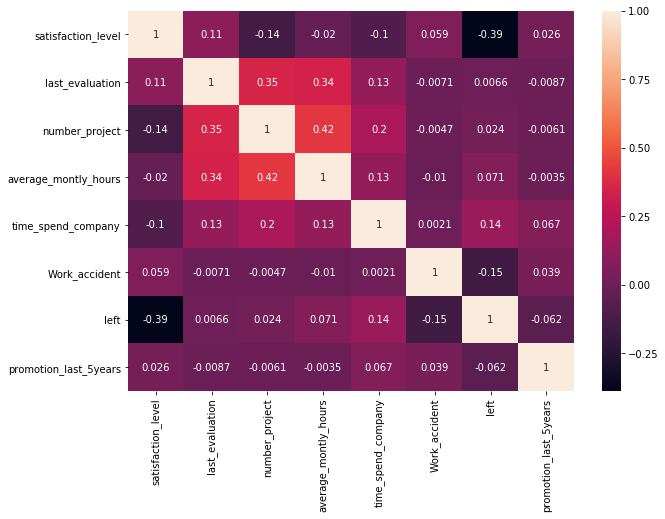

In [10]:
"""3.Рассчитать и визуализировать корреляционную матрицу для переменных."""
correlation=df.corr()
fig, ax = plt.subplots(figsize=(10,7))  
sns.heatmap(correlation,annot=True,ax=ax)

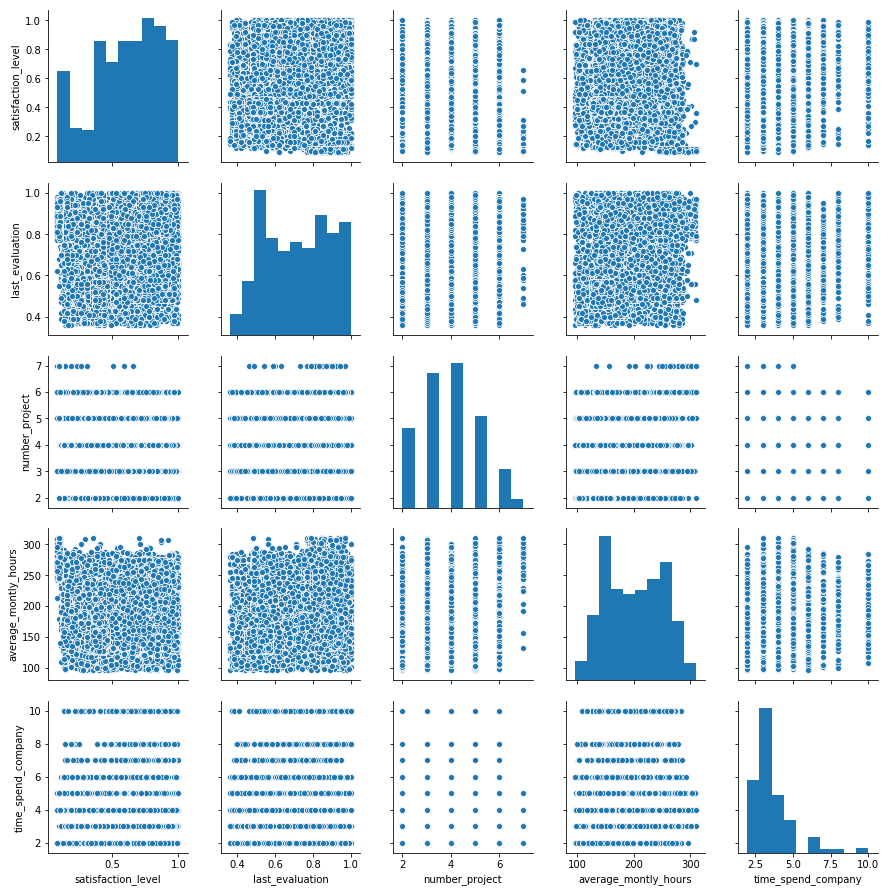

In [11]:
"""4.Визуализировать несколько взаимосвязей между переменными"""
sns.pairplot(df, vars=['satisfaction_level', 'last_evaluation',
                       'number_project', 'average_montly_hours','time_spend_company'])

In [16]:
"""5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными."""

sts.ttest_ind(df['satisfaction_level'] ,df['last_evaluation'])


Ttest_indResult(statistic=-41.89868154070206, pvalue=0.0)

Между уровнем удовлетворённости и уровнем последней оценки, p-value не показывает какой либо взаимосвязи

In [20]:
"""6.Рассчитать сколько работников работает в каждом департаменте."""
emp_count = df['sales'].value_counts().reset_index()
emp_count.columns=["Department","Number employees"]
emp_count
em

,Department,Number employees
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


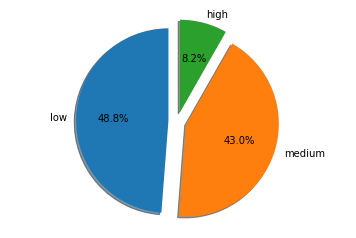

In [66]:
"""7. Показать распределение сотрудников по зарплатам."""
salary = df['salary'].value_counts().reset_index()
salary.columns=['label','count']
salary['percent']=salary['count'] / salary['count'].sum()
labels = salary['label'].values.tolist()
sizes = salary['percent'].values.tolist()
explode = (0.1, 0.1, 0.1,)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

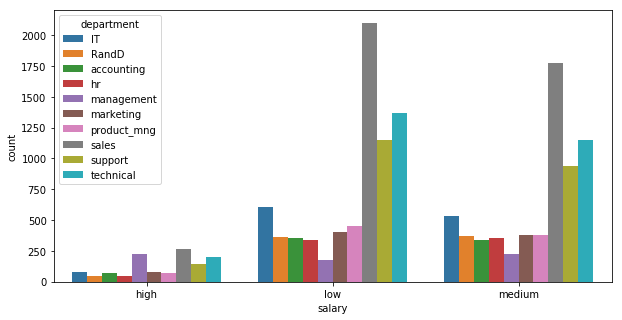

In [75]:
"""8.Показать распределение сотрудников по зарплатам совместно с департаментами."""
dsalary=df.groupby(['sales', 'salary']).size().reset_index()
dsalary.columns=['department','salary','count']
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.barplot(x="salary",y="count",data=dsalary,hue="department",ax=ax)
plt.show()

In [77]:
"""9.Сколько сотрудников покинули компанию."""
print("{} сотрудников покинуло компанию".format(df["left"].sum()))

3571 сотрудников покинуло компанию


In [94]:
"""10.Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию."""
# зависит ли  уход от времени проведенного на работе

nleft = df[df['left'] == 0]['satisfaction_level']
left = df[df['left'] == 1]['satisfaction_level']
# сотрудники уходят из за низкой удовлетворенности работой))))
sts.ttest_ind(nleft, left)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

In [88]:
# зависит ли  уход от повышения
sts.ttest_ind(df['left'], df['promotion_last_5years'])
#уволенных сотрудников повышали реже

Ttest_indResult(statistic=59.04705286517299, pvalue=0.0)